# Text Analytics

[Text Analytics](https://people.ischool.berkeley.edu/~hearst/text-mining.html) (or text mining) is the process of deriving high-quality information from text. It involves "the discovery by computer of new, previously unknown information, by automatically extracting information from different written resources." Written resources may include websites, books, emails, reviews, and articles.

### Applications
There are many applications of text analytics, for example:
* Search for relevant websites or articles using a search engine
* Sentiment Analysis (e.g. classify tweets or film reviews as positive, neutral or negative)
* Chatbots (e.g. Siri, Alexa)
* Project idea: The Impact of Donald Trump’s Tweets on Financial Markets
* Etc.

### Some important concepts
* Document = some text i.e. a string (e.g. a sentence, a tweet, paragraph of text, book, news article, etc.).
* Corpus = collection of documents.
* Dictionary = list of unique tokens in (preprocessed) corpus.

### Tokenization and Stopwords
Tokens are the elementary building blocks (words, numbers, characters) in a document. Tokenization is the process of splitting an input
sequence into tokens. Example: "I love data science" --> "I", "love", "data", "science". Stopwords are common words that appear very frequently (e.g. "is", "and", "you", etc.). It is convenient to remove them as they do not add much to the content of a document and are therefore generally not useful for text analysis or, worse still, make it worse by adding noise.

### Lemmatization and Stemming
* Goal: have the same token for different forms of a word (e.g. fishing, fished, fisher, fishers, etc.)
* Lemmatization: Find what is the lemma of a word (e.g. feet -> foot)
* Stemming: one method for lemmatization where rules that remove the ending of a word are applied (e.g. fishing -> fish)


### Text Representation
* Goal: transform text into numerical features such that it can be used ML algorithms.
* Bag of Words (BOW): works in many case but order is not preserved (solution: n-grams)
* TF-IDF: emphasizes important words
* Text embeddings: dense vector representations reflecting text semantics.


## Text Preparation
In this section, we explain how to prepare a text for analysis. This includes tockeninzing the text, removing stopwords, etc.

### 1. Install spaCy and gensim
[spaCy](https://spacy.io/) is an open-source natural language processing library for Python. It is designed particularly for production use, and it can help us to build applications that process massive volumes of text efficiently.

We install the library and its English-language model.

In [1]:
# Install and update spaCy
!pip install -U spacy

# Download the english language model
!python -m spacy download en

!pip install -U gensim

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.2 MB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# Import required packages
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np

### 2. Tokenization

Tokenization is the process of breaking a text into pieces called tokens. A token simply refers to an individual part of a sentence having some semantic value. SpaCy‘s tokenizer takes input in form of unicode text and outputs a sequence of token objects. In addition, SpaCy automatically breaks your document into tokens when a document is created using the language model.

Let’s take a look at a simple example. Imagine we have the following text, and we would like to tokenize it:

> When learning machine learning, you shouldn't get discouraged!

> Challenges and setbacks aren't failures, they're just part of the journey. You've got this!

There are a couple of different ways we can appoach this. The first is called __word tokenization__, which means breaking up the text into individual words. This is a critical step for many language processing applications, as they often require inputs in the form of individual words rather than longer strings of text.

In [3]:
# Load English language model
sp = spacy.load('en_core_web_sm')

# This is our text
text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""

# spaCy object is used to create a document
my_doc = sp(text)

my_doc

When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!

In [4]:
# This is a spaCy document
type(my_doc)

spacy.tokens.doc.Doc

In [5]:
# Create list of tokens
token_list = []

for token in my_doc:
    token_list.append(token.text)

token_list

['When',
 'learning',
 'data',
 'science',
 ',',
 'you',
 'should',
 "n't",
 'get',
 'discouraged',
 '!',
 '\n',
 'Challenges',
 'and',
 'setbacks',
 'are',
 "n't",
 'failures',
 ',',
 'they',
 "'re",
 'just',
 'part',
 'of',
 'the',
 'journey',
 '.',
 'You',
 "'ve",
 'got',
 'this',
 '!']

As we can see, spaCy produces a list that contains each token as a separate item. Notice that it has recognized that contractions such as _shouldn’t_ actually represent two distinct words, and has thus broken them down into two distinct tokens.

In the example above, we first load the language dictionary. Here we load the english one using `spacy.load('en_core_web_sm')` create an object of this class, "sp", which is used to create documents with linguistic annotations and various language properties. After creating the document, we create a list of tokens.

We can also see the parts-of-speech (POS) of each of these tokens using the `.pos_` attribute, as shown below. POS tagging can be really useful, particularly if you have words or tokens that can have multiple POS tags. For instance, the word "fish" can be used as both a noun and verb, depending upon the context.

In [6]:
# POS
for word in my_doc:
    print(word.text, word.pos_)

When SCONJ
learning VERB
data NOUN
science NOUN
, PUNCT
you PRON
should AUX
n't PART
get AUX
discouraged VERB
! PUNCT

 SPACE
Challenges NOUN
and CCONJ
setbacks NOUN
are AUX
n't PART
failures NOUN
, PUNCT
they PRON
're AUX
just ADV
part NOUN
of ADP
the DET
journey NOUN
. PUNCT
You PRON
've AUX
got VERB
this PRON
! PUNCT


In [7]:
# Another example
doc1 = sp("I like to fish") # verb
doc2 = sp("I eat a fish") # noun

for word in doc1:
  print(word.text, word.pos_)

print("-----------------")

for word in doc2:
  print(word.text, word.pos_)

I PRON
like VERB
to PART
fish VERB
-----------------
I PRON
eat VERB
a DET
fish NOUN



If we want, we can also break the text into sentences rather than words. This is called __sentence tokenization__. When performing sentence tokenization, the tokenizer looks for specific characters that normally fall between sentences, like periods, exclaimation points, and newline characters.

In [8]:
# create list of sentence tokens
sents_list = []

for sent in my_doc.sents:
    sents_list.append(sent.text)

sents_list

["When learning data science, you shouldn't get discouraged!\n",
 "Challenges and setbacks aren't failures, they're just part of the journey.",
 "You've got this!"]

### 3. Remove Stopwords
Most text data that we work with is going to contain a lot of words that are not actually useful to us. These words, called stopwords, are useful in human speech, but they do not have much to contribute to the meaning of a sentence. Removing stopwords helps us eliminate noise and distraction from our text data, and also speeds up the time of the analysis (since there are fewer words to process). This makes text analysis more efficient.

Let’s take a look at the stopwords spaCy includes by default.

In [9]:
# Import stopwords from English language
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

# Print total number of stopwords
print('Number of stopwords: %d' % len(spacy_stopwords))

# Print 20 stopwords
print('20 stopwords: %s' % list(spacy_stopwords)[:20])

Number of stopwords: 326
20 stopwords: ['hereby', 'whole', 'least', 'forty', 'regarding', 're', 'eleven', 'behind', 'him', 'other', 'had', 'then', 'that', 'enough', 'just', 'no', 'hereafter', 'very', 'ca', 'otherwise']


Now that we’ve got our list of stopwords, let’s use it to remove the stopwords from the text string we were working on in the previous section.

In [10]:
# Which words will be removed?
my_doc

When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!

In [11]:
# Declare list for filtered sentence
filtered_sent = []

# Filter stopwords
for word in my_doc:
    if word.is_stop == False:
        filtered_sent.append(word.text)

filtered_sent

['learning',
 'data',
 'science',
 ',',
 'discouraged',
 '!',
 '\n',
 'Challenges',
 'setbacks',
 'failures',
 ',',
 'journey',
 '.',
 'got',
 '!']

In [12]:
# We can also remove the punctuation
filtered_sent2 = []
removed_tokens = []

# Filter stopwords, punctuation and spaces
for word in my_doc:
  if (word.is_stop == True) or (word.is_punct == True) or (word.is_space == True):
    removed_tokens.append(word.text)
  else:
    filtered_sent2.append(word.text)

removed_tokens

['When',
 ',',
 'you',
 'should',
 "n't",
 'get',
 '!',
 '\n',
 'and',
 'are',
 "n't",
 ',',
 'they',
 "'re",
 'just',
 'part',
 'of',
 'the',
 '.',
 'You',
 "'ve",
 'this',
 '!']

In [13]:
filtered_sent2

['learning',
 'data',
 'science',
 'discouraged',
 'Challenges',
 'setbacks',
 'failures',
 'journey',
 'got']

### 4. Lemmatization
Lemmatization is a way of dealing with the fact that while words like connect, connection, connecting, connected, etc. aren’t exactly the same, they all have the same essential meaning: connect. The differences in spelling have grammatical functions in spoken language, but for machine processing, those differences can be confusing, so we need a way to change all the words that are forms of the word connect into the word connect itself.

One method for doing this is called __stemming__. Stemming involves simply lopping off easily-identified prefixes and suffixes to produce what’s often the simplest version of a word, the root. Connection, for example, would have the -ion suffix removed and be correctly reduced to connect. This kind of simple stemming is often all that’s needed, but lemmatization—which actually looks at words and their roots (called lemma) as described in the dictionary—is more precise (e.g feet -> foot).

Let's look at this simple example.

In [14]:
# Lemmatization
lem = sp("run runs ran running runner runners")

# Find lemma for each word
for word in lem:
    print(word.text, word.lemma_)

run run
runs run
ran run
running run
runner runner
runners runner


## Text Representation
We now show how to transform a text into an usable input for text classification. 

In [15]:
# Sentences
s1 = """
President Donald Trump gets a lot of attention for using Twitter to attack American trading partners, political foes, and media companies."""
s2 = """Donald Trump is a great friend, and he has four or five Picassos on his plane. And that's where I would look at them.""" # from Shaquille O'Neal
s3 = """Donald Trump is a phony, a fraud. His promises are as worthless as a degree from Trump University.""" # from Mitt Romney

# List of sentences
texts = [s1, s2, s3]

### 1. Bag of Words (BOW)
We use the [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class of scikit learn.

In [16]:
# Using default tokenizer 
count = CountVectorizer(ngram_range=(1,2), stop_words="english")
bow = count.fit_transform(texts)

# Show feature matrix
bow.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 1]])

In [17]:
# Get feature names
feature_names = count.get_feature_names_out()

# View feature names
feature_names

array(['american', 'american trading', 'attack', 'attack american',
       'attention', 'attention using', 'companies', 'degree',
       'degree trump', 'donald', 'donald trump', 'foes', 'foes media',
       'fraud', 'fraud promises', 'friend', 'friend picassos', 'gets',
       'gets lot', 'great', 'great friend', 'look', 'lot',
       'lot attention', 'media', 'media companies', 'partners',
       'partners political', 'phony', 'phony fraud', 'picassos',
       'picassos plane', 'plane', 'plane look', 'political',
       'political foes', 'president', 'president donald', 'promises',
       'promises worthless', 'trading', 'trading partners', 'trump',
       'trump gets', 'trump great', 'trump phony', 'trump university',
       'twitter', 'twitter attack', 'university', 'using',
       'using twitter', 'worthless', 'worthless degree'], dtype=object)

In [18]:
# Show as a dataframe
pd.DataFrame(
    bow.todense(), 
    columns=feature_names
    )

,american,american trading,attack,attack american,attention,attention using,companies,degree,degree trump,donald,...,trump great,trump phony,trump university,twitter,twitter attack,university,using,using twitter,worthless,worthless degree
0,1,1,1,1,1,1,1,0,0,1,...,0,0,0,1,1,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,1,1,0,0,1,0,0,1,1


### 2. TF-IDF Representation

We use the TF-IDF (Term Frequency-Inverse Document Frequency) to vectorize the documents. This is a way of representing how important a particular term is in the context of a given document, based on how many times the term appears and how many other documents that same term appears in. The higher the TF-IDF, the more important that term is to that document. It is important to mention that the IDF value for a word remains the same throughout all the documents as it depends upon the total number of documents. On the other hand, TF values of a word differ from document to document.

Recall that:

- term frequency tf = count(word, document) / len(document) 
- term frequency idf = log( len(collection) / count(document_containing_term, collection) )
- tf-idf = tf * idf 


In [19]:
# Using default tokenizer in TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 1), stop_words="english")
features = tfidf.fit_transform(texts)
pd.DataFrame(
    features.todense(),
    columns=tfidf.get_feature_names_out()
)

,american,attack,attention,companies,degree,donald,foes,fraud,friend,gets,...,plane,political,president,promises,trading,trump,twitter,university,using,worthless
0,0.260841,0.260841,0.260841,0.260841,0.000000,0.154057,0.260841,0.000000,0.00000,0.260841,...,0.00000,0.260841,0.260841,0.000000,0.260841,0.154057,0.260841,0.000000,0.260841,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.247433,0.000000,0.000000,0.41894,0.000000,...,0.41894,0.000000,0.000000,0.000000,0.000000,0.247433,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.359347,0.212236,0.000000,0.359347,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.359347,0.000000,0.424472,0.000000,0.359347,0.000000,0.359347


In [20]:
texts

['\nPresident Donald Trump gets a lot of attention for using Twitter to attack American trading partners, political foes, and media companies.',
 "Donald Trump is a great friend, and he has four or five Picassos on his plane. And that's where I would look at them.",
 'Donald Trump is a phony, a fraud. His promises are as worthless as a degree from Trump University.']

### n-grams
Below we create a TF-IDF Representation of the three above sentences using bigrams and the following stopwords: ["and", "a", "is"].

In [21]:
tfidf = TfidfVectorizer(ngram_range=(2, 2), stop_words=["and", "a", "is"])
features = tfidf.fit_transform(texts)
pd.DataFrame(
    features.todense(),
    columns=tfidf.get_feature_names_out()
)

,american trading,are as,as degree,as worthless,at them,attack american,attention for,degree from,donald trump,five picassos,...,trading partners,trump gets,trump great,trump phony,trump university,twitter to,using twitter,where would,worthless as,would look
0,0.240085,0.000000,0.000000,0.000000,0.000000,0.240085,0.240085,0.000000,0.141798,0.000000,...,0.240085,0.240085,0.000000,0.000000,0.000000,0.240085,0.240085,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.240085,0.000000,0.000000,0.000000,0.141798,0.240085,...,0.000000,0.000000,0.240085,0.000000,0.000000,0.000000,0.000000,0.240085,0.000000,0.240085
2,0.000000,0.284569,0.284569,0.284569,0.000000,0.000000,0.000000,0.284569,0.168071,0.000000,...,0.000000,0.000000,0.000000,0.284569,0.284569,0.000000,0.000000,0.000000,0.284569,0.000000


## Introduction to Gensim and Word Embeddings

In the following, we illustrate how we can find out the relations between words in a dataset, compute the similarity between them, or use the vector representation of those words as input for text classification.

We use Gensim. A complete tutorial can be found [here](https://www.tutorialspoint.com/gensim/gensim_introduction.htm).

### 1. Word Embedding with Word2Vec

Word embediing approaches use a neural network-based techniques to convert words into corresponding vectors so that semantically similar vectors are close to each other in an N-dimensional space, where N refers to the dimensions of the vectors. The underlying assumption is that two words sharing similar contexts also share a similar meaning and consequently a similar vector representation from the model. For example, "dog", "puppy" and "pup" are often used in similar situations, with similar surrounding words like "good", "fluffy" or "cute", and will therefore share a similar vector representation.

Widely used word embeddings model is [Google's Word2Vec model](https://code.google.com/archive/p/word2vec/) created from billions of documents. GloVe (by Stanford) is an extension of Word2Vec. More information [here](https://nlp.stanford.edu/projects/glove/). 

For more detail on Word2Vec you can also watch this [video](https://www.youtube.com/watch?v=yFFp9RYpOb0).

In [22]:
# Import required packages
import gensim
from gensim.models import Word2Vec
import bs4 as bs
import urllib.request
import string
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Get texts from Wikipedia
def get_text(url):
  scrapped_data = urllib.request.urlopen(url)
  article = scrapped_data.read()
  parsed_article = bs.BeautifulSoup(article,'html.parser')
  paragraphs = parsed_article.find_all('p')
  article_text = ""
  for p in paragraphs:
    article_text += p.text
  return article_text

machine_learning = get_text("https://en.wikipedia.org/wiki/Machine_learning")
ai = get_text("https://en.wikipedia.org/wiki/Artificial_intelligence")

machine_learning

'Machine learning (ML) is an umbrella term for solving problems for which development of algorithms by human programmers would be cost-prohibitive, and instead the problems are solved by helping machines "discover" their "own" algorithms,[1] without needing to be explicitly told what to do by any human-developed algorithms.[2] Recently, generative artificial neural networks have been able to surpass results of many previous approaches.[3][4] Machine-learning approaches have been applied to large language models, computer vision, speech recognition, email filtering, agriculture and medicine, where it is too costly to develop algorithms to perform the needed tasks.[5][6]\nThe mathematical foundations of ML are provided by mathematical optimization (mathematical programming) methods. Data mining is a related (parallel) field of study, focusing on exploratory data analysis through unsupervised learning.[8][9]\nML is known in its application across business problems under the name predictiv

In [24]:
ai

'\nArtificial intelligence (AI) is the intelligence of machines or software, as opposed to the intelligence of humans or animals. It is also the field of study in computer science that develops and studies intelligent machines. "AI" may also refer to the machines themselves.\nAI technology is widely used throughout industry, government and science. Some high-profile applications are: advanced web search engines (e.g., Google Search), recommendation systems (used by YouTube, Amazon, and Netflix), understanding human speech (such as Siri and Alexa), self-driving cars (e.g., Waymo), generative or creative tools (ChatGPT and AI art), and competing at the highest level in strategic games (such as chess and Go).[1]\nArtificial intelligence was founded as an academic discipline in 1956.[2] The field went through multiple cycles of optimism[3][4] followed by disappointment and loss of funding,[5][6] but after 2012, when deep learning surpassed all previous AI techniques,[7] there was a vast in

In [25]:
# Group texts in list
texts = [machine_learning, ai]

###### Tokenizing the Data With spaCy

We create a `spacy_tokenizer()` function that accepts a sentence as input and processes the sentence into tokens, performing lemmatization, lowercasing, and removing stopwords.

__A note from spacy documentation__: spaCy adds a special case for pronouns: all pronouns are lemmatized to the special token `-PRON-`. Unlike verbs and common nouns, there’s no clear base form of a personal pronoun. Should the lemma of “me” be “I”, or should we normalize person as well, giving “it” — or maybe “he”? spaCy’s solution is to introduce a novel symbol, `-PRON-`, which is used as the lemma for all personal pronouns.

In [26]:
# Create tokenizer function for preprocessing
def spacy_tokenizer(text):

    # Define stopwords, punctuation, and numbers
    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    punctuations = string.punctuation
    numbers = "0123456789"

    # Create spacy object
    mytokens = sp(text)

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Remove sufix like ".[1" in "experience.[1"
    mytokens_2 = []
    for word in mytokens:
      for char in word:
        if (char in punctuations) or (char in numbers):
          word = word.replace(char, "")
      if word != "":
        mytokens_2.append(word)

    # Return preprocessed list of tokens
    return mytokens_2

# Tokenize texts
processed_texts = []
for text in texts:
  processed_text = spacy_tokenizer(text)
  processed_texts.append(processed_text)

In [27]:
for processed_text in processed_texts:
  print(processed_text[:20])

['machine', 'learning', 'ml', 'umbrella', 'term', 'solve', 'problem', 'development', 'algorithm', 'human', 'programmer', 'cost', 'prohibitive', 'instead', 'problem', 'solve', 'help', 'machine', 'discover', 'algorithms']
['artificial', 'intelligence', 'ai', 'intelligence', 'machine', 'software', 'oppose', 'intelligence', 'human', 'animal', 'field', 'study', 'computer', 'science', 'develop', 'study', 'intelligent', 'machine', 'ai', 'refer']


In [28]:
# Word embedding 
### Parameters: 
#     - min_count: minimum number of occurence of single word in corpus to be taken into account
#     - size: dimension of the vectors representing the tokens
#     - IMPORTANT: processed_texts must be a list of lists of tokens object!
word2vec = Word2Vec(processed_texts, min_count=2, vector_size=100)
vocab = list(word2vec.wv.key_to_index.keys())
print(vocab)

['learning', 'machine', 'ai', 'use', 'learn', 'datum', 'model', 'algorithm', 'problem', 'artificial', 'human', 'system', 'intelligence', 'network', 'example', 'training', 'include', 'decision', 'method', 'knowledge', 'neural', 'input', 'program', 'field', 'set', 'base', 'research', 'computer', 'feature', 'search', 'theory', 'approach', 'find', 'goal', 'train', 'process', 'deep', 'solve', 'classification', 'function', 'rule', 'bias', 'researcher', 'output', 'represent', 'know', 'large', 'task', 'risk', 'neuron', 'agent', 'image', 'develop', 'information', 'application', 'logic', 'term', 'increase', 'technique', 'people', 'like', 'specific', 'perform', 'action', 'general', 'high', 'analysis', 'result', 'reasoning', 'representation', 'consider', 'layer', 'study', 'language', 'label', 'time', 'technology', 'require', 's', 'lead', 'prediction', 'number', 'optimization', 'pattern', 'new', 'signal', 'mind', 'identify', 'supervised', 'possible', 'define', 'world', 'work', 'real', 'mathematical

In [29]:
# Vector
v1 = word2vec.wv['intelligence'] 
v1

array([-0.02102035,  0.02444497,  0.0152574 , -0.00382197, -0.00206097,
       -0.05719496,  0.02065957,  0.07822515, -0.00942236, -0.01890632,
       -0.02901557, -0.04368744, -0.02079357,  0.00803007, -0.01079948,
       -0.03478552,  0.00586349, -0.0317552 ,  0.00344124, -0.06343095,
        0.00869639,  0.02721186,  0.0103942 , -0.00125158, -0.01900052,
        0.01548288, -0.03693912, -0.00898711, -0.02337154,  0.01439883,
        0.03585026,  0.01300302,  0.00786632, -0.02017478, -0.02745427,
        0.0391806 , -0.0084878 , -0.03481844, -0.02247536, -0.06249624,
        0.00608581, -0.01531103, -0.00984825, -0.00931212,  0.02264604,
       -0.02510201, -0.02028027, -0.01455737,  0.02169105,  0.02402383,
        0.02550059, -0.03407102,  0.00476548, -0.00564558, -0.02226501,
        0.01179013,  0.01485154, -0.00115969, -0.02807726,  0.0122442 ,
        0.00928012,  0.00459585,  0.0066204 , -0.02226645, -0.05472422,
        0.02472538,  0.01821409,  0.0252281 , -0.05758399,  0.03

In [30]:
# Similar vectors/words
sim_words = word2vec.wv.most_similar('intelligence')
sim_words

[('ai', 0.9666534066200256),
 ('learning', 0.9638615846633911),
 ('use', 0.9614884853363037),
 ('machine', 0.9606254696846008),
 ('human', 0.96016526222229),
 ('learn', 0.9583305716514587),
 ('solve', 0.9562678337097168),
 ('find', 0.9545618891716003),
 ('problem', 0.9537623524665833),
 ('artificial', 0.9531496167182922)]

In [31]:
# Similarity between two words
word2vec.wv.similarity('computer', 'animal')

0.3795771

In [32]:
word2vec.wv.similarity('computer', 'machine')

0.9609003

Remarks:
* Many things can be done with Gensim (e.g. [topic modelling](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/))
* There exists also `Doc2Vec`, which is used to create a vectorised representation of a group of words (i.e. a document) taken collectively as a single unit (illustrated in the next section).

## Complaints Classification using TF-IDF and Embeddings (Doc2Vec, Word2Vec)
We classify consumer finance complaints into 12 pre-defined categories using:
* TF-IDF and logistic regression
* Doc2Vec and logistic regression
* Word2Vec and logistic regression

[Doc2Vec](https://radimrehurek.com/gensim/models/doc2vec.html) is used to create a vectorised representation (embeddings) of a group of words (i.e. a document) taken collectively as a single unit. It uses a similar idea as Word2Vec where now the embeddings (vectors) of similar documents are close to each other in n-dimensional space.


### 1. Load and clean data
We work with a sample of a large data set from Data.gov that can be found on [here](https://catalog.data.gov/dataset/consumer-complaint-database).



In [33]:
# Load data
df = pd.read_csv('complaints_sample.csv', index_col=0)
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2012-12-24,Credit card,NaN,Rewards,NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",IL,60611,NaN,NaN,Web,2012-12-24,Closed with explanation,Yes,No,217083
1,2013-12-17,Mortgage,Conventional fixed mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,REGIONS FINANCIAL CORPORATION,FL,33415,NaN,NaN,Web,2013-12-17,Closed with explanation,Yes,Yes,636638
2,2018-04-23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,77386,NaN,NaN,Fax,2018-04-23,Closed with explanation,Yes,NaN,2883487
3,2019-01-04,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,NaN,HSBC NORTH AMERICA HOLDINGS INC.,AZ,94521,NaN,NaN,Referral,2019-01-08,Closed with explanation,Yes,NaN,3118526
4,2014-07-22,Debt collection,Payday loan,Cont'd attempts collect debt not owed,Debt is not mine,NaN,NaN,"ENOVA INTERNATIONAL, INC.",GA,30038,NaN,NaN,Web,2014-07-22,Closed with explanation,Yes,No,948293


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9101 entries, 0 to 9100
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 9101 non-null   object
 1   Product                       9101 non-null   object
 2   Sub-product                   7942 non-null   object
 3   Issue                         9101 non-null   object
 4   Sub-issue                     6251 non-null   object
 5   Consumer complaint narrative  3137 non-null   object
 6   Company public response       3863 non-null   object
 7   Company                       9101 non-null   object
 8   State                         8946 non-null   object
 9   ZIP code                      8199 non-null   object
 10  Tags                          1171 non-null   object
 11  Consumer consent provided?    5869 non-null   object
 12  Submitted via                 9101 non-null   object
 13  Date sent to company   

The data set includes 18 columns and 9101 rows describing consumer complaints about financial products. In this case, we want to predict the `Product` type (class) based on the text of the complaint (i.e. `Consumer complaint narrative`).

In [35]:
# Select columns of interest
data = df[["Product", "Consumer complaint narrative"]]
data.head()

,Product,Consumer complaint narrative
0,Credit card,NaN
1,Mortgage,NaN
2,"Credit reporting, credit repair services, or o...",NaN
3,Checking or savings account,NaN
4,Debt collection,NaN


Around 2/3 of the complaints are null values. They are not useful for the prediction so we drop them.

In [36]:
# Drop NaN
print(data.isnull().sum())
data = data.dropna().reset_index(drop=True)
data.head()

Product                            0
Consumer complaint narrative    5964
dtype: int64


,Product,Consumer complaint narrative
0,Credit card or prepaid card,Back in XX/XX/2019 a company called XXXX charg...
1,"Credit reporting, credit repair services, or o...",XXXX is reporting a single late payment over 7...
2,"Credit reporting, credit repair services, or o...","I have disputed the following account, ( 1 ) X..."
3,"Credit reporting, credit repair services, or o...",In XX/XX/XXXXI disputed the following items on...
4,Credit card or prepaid card,The response from Citi Cards has cleared up a ...


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       3137 non-null   object
 1   Consumer complaint narrative  3137 non-null   object
dtypes: object(2)
memory usage: 49.1+ KB


We end up with 3137 complaints for which we would like to predict the product concerned.

### 2. Analyze the Data

In [38]:
# Total number of words - over 600,000
data['Consumer complaint narrative'].apply(lambda x: len(x.split(' '))).sum()

610062

In [39]:
# Sample
data['Consumer complaint narrative'].sample().values[0]

'I received an American Express/Skymiles card in the mail which I did NOT apply for, but which used my correct first and last name, although I always use my full name on any official document or contract. On the same day, an additional notice from AmEx came in a separate envelope which stated " We received your request to update your email address to XXXXXXXXXXXX \'\' ( this is NOT my email address ). Obviously, the individual who opened this fraulent card account is the same individual who changed the email address ( which he/she did so before even receiving the actual card ), which might be indicative that the account was opened via email. I called the AmEx number on the back of the card after I open this mail on XXXX XXXX and subsequently spent several hours on the phone with several American Express representatives - none of whom were particualrly helpful and each of whom asked my to provide my full name and social security number. I refused to provide my SSN. \nI requested : 1. Th

The data has been anonymized (i.e. names, dates, IDs, etc. have been replaced by XXXX).

Check out the classes counts. There are several classes with very few samples.

In [40]:
data.Product.value_counts()

Product
Credit reporting, credit repair services, or other personal consumer reports    1123
Debt collection                                                                  640
Mortgage                                                                         378
Credit card or prepaid card                                                      211
Credit reporting                                                                 167
Student loan                                                                     129
Checking or savings account                                                      119
Credit card                                                                       74
Money transfer, virtual currency, or money service                                64
Bank account or service                                                           64
Vehicle loan or lease                                                             57
Payday loan, title loan, or personal loan                

There are 17 categories. We group some of them together (e.g. `Credit card`, `Prepaid card`, and `Credit or prepaid card`) because they are sub-categories of each other. We end up with 12 categories.

In [41]:
# Clean
dic_replace = {'Credit reporting':'Credit reporting, credit repair services, or other personal consumer reports', 
               'Credit card':'Credit card or prepaid card', 
               'Payday loan':'Payday loan, title loan, or personal loan', 
               'Money transfers':'Money transfer, virtual currency, or money service',
               'Prepaid card':'Credit card or prepaid card',
               'Virtual currency':'Money transfer, virtual currency, or money service'}
data.replace(dic_replace, inplace=True)
data.Product.value_counts()

Product
Credit reporting, credit repair services, or other personal consumer reports    1290
Debt collection                                                                  640
Mortgage                                                                         378
Credit card or prepaid card                                                      291
Student loan                                                                     129
Checking or savings account                                                      119
Money transfer, virtual currency, or money service                                72
Bank account or service                                                           64
Vehicle loan or lease                                                             57
Payday loan, title loan, or personal loan                                         55
Consumer Loan                                                                     38
Other financial service                                  

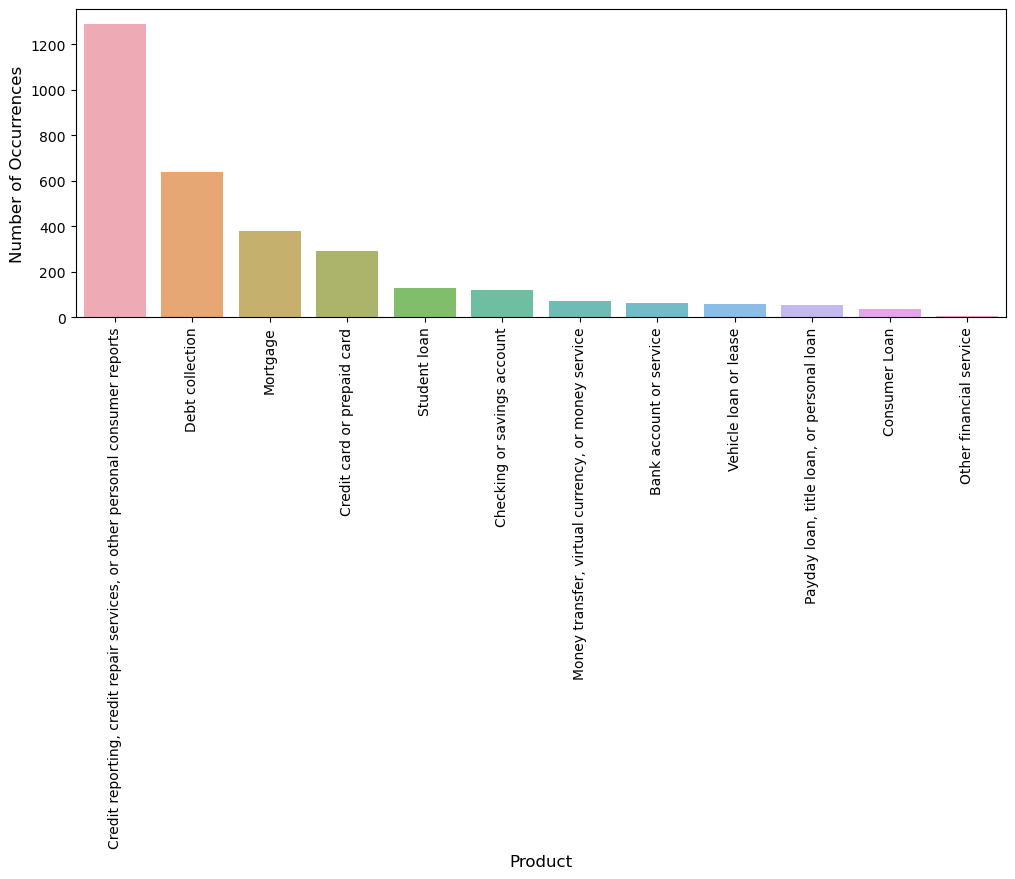

In [42]:
# Plot number of complaints per category
cnt_pro = data['Product'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=cnt_pro.index, y=cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Let's compute the base rate - the proportion of the majority class.

In [43]:
# Base rate
round(len(data[data.Product == "Credit reporting, credit repair services, or other personal consumer reports"]) / len (data), 4)

0.4112

### 3. Classification using TF-IDF and Logistic Regression

In [44]:
# Import packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [45]:
# Define tokenizer function
def spacy_tokenizer(sentence):

    punctuations = string.punctuation
    stop_words = spacy.lang.en.stop_words.STOP_WORDS

    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Remove anonymous dates and people
    mytokens = [ word.replace('xx/', '').replace('xxxx/', '').replace('xx', '') for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in ["xxxx", "xx", ""] ]

    # Return preprocessed list of tokens
    return mytokens

In [46]:
# Select features
X = data['Consumer complaint narrative'] # the features we want to analyze
ylabels = data['Product'] # the labels, or answers, we want to test against

# Train test split (20% as test)
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=1234)

X_train

949     I have contacted Equifax several times via pho...
884     There are many mistakes appear in my report wi...
1441    I received a notice of debt from PSC regarding...
582     AFTER RECEIVING A CURRENT COPY OF MY CREDIT RE...
1515    A check was stolen from our checkbook and cash...
                              ...                        
664     Home Depot credit card number on bill does not...
3125    Lawsuit and judgment filed against me for a de...
1318    Was lied to about the payment and what the pay...
723     To All party involve XXXX XXXX. XXXX XXXX XXXX...
2863    I tried unsuccessfully today ( XX/XX/2017 ) to...
Name: Consumer complaint narrative, Length: 2509, dtype: object

In [47]:
y_train

949     Credit reporting, credit repair services, or o...
884     Credit reporting, credit repair services, or o...
1441                                      Debt collection
582     Credit reporting, credit repair services, or o...
1515                          Checking or savings account
                              ...                        
664                           Credit card or prepaid card
3125                                      Debt collection
1318                                      Debt collection
723     Credit reporting, credit repair services, or o...
2863    Credit reporting, credit repair services, or o...
Name: Product, Length: 2509, dtype: object

In [ ]:
# Define vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), tokenizer=spacy_tokenizer)

# Define classifier
classifier = LogisticRegression(solver='lbfgs', max_iter=1000)

# Create pipeline to combine the TfIdf and the classifier
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

0.7373


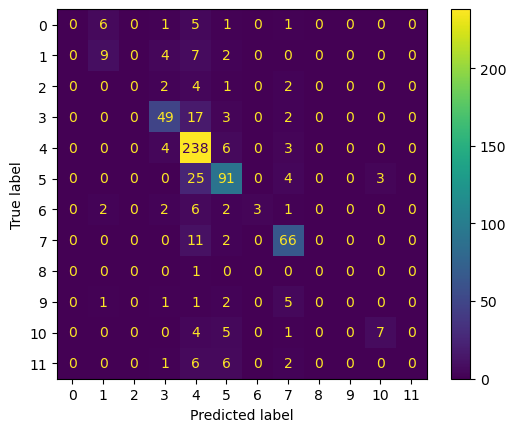

In [49]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluate model
print(round(accuracy_score(y_test, y_pred), 4))
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = ConfusionMatrixDisplay(conf_mat)

conf_mat.plot()

### 4. Doc2Vec embeddings and Logistic Regression
We now try to do the same exercise, but using text embeddings. Below we train Doc2Vec on our dataset.

In [50]:
# Tokenize data - same tokenizer function as before
from gensim.models.doc2vec import TaggedDocument
sample_tagged = data.apply(lambda r: TaggedDocument(words=spacy_tokenizer(r['Consumer complaint narrative']), tags=[r.Product]), axis=1)
print(sample_tagged.head(20))

0     ([2019, company, charge, credit, card, 230.00,...
1     ([report, single, late, payment, 7, year, old,...
2     ([dispute, following, account, 1, 4.00, 2, 0.0...
3     ([i, dispute, follow, item, credit, report, bu...
4     ([response, citi, cards, clear, lot, confusion...
5     ([concern, contact, today, try, payment, mortg...
6     ([write, letter, file, complaint, begin, recei...
7     ([2016, purchase, truck, tell, finance, manage...
8     ([employer, submit, background, check, receive...
9     ([authorize, hard, credit, pull, credit, autho...
10    ([rushcard, access, fund, account, negative, b...
11    ([old, closed, account, remove, old, voluntary...
12    ([executive, offices, department, credit, card...
13    ([2, hard, inquiries, cbna, apply, card, suspe...
14    ([hard, inquiry, submit, credit, report, barcl...
15    ([request, credit, report, notice, account, re...
16    ([yes, send, letter, state, want, verification...
17    ([capital, auto, finance, tx, copy, letter

In [51]:
sample_tagged.values[10]

TaggedDocument(words=['rushcard', 'access', 'fund', 'account', 'negative', 'balance', 'week', 'customer', 'service', 'hang', 'numerous', 'time', 'hold', 'hr', 'time', 've', 'finally', 'tell', 'idea', 'money', 've', 'file', 'email', 'complaint', 'receive', 'different', 'ticket', 'number', "''", 'respond', 'week', 'basically', 'm', 'answer'], tags=['Credit card or prepaid card'])

In [52]:
# Train test split - same split as before
train_tagged, test_tagged = train_test_split(sample_tagged, test_size=0.2, random_state=1234)

train_tagged

949     ([contact, equifax, time, phone, online, class...
884     ([mistake, appear, report, understanding], [Cr...
1441    ([receive, notice, debt, psc, regard, medical,...
582     ([receive, current, copy, credit, report, disc...
1515    ([check, steal, checkbook, cash, 2000.00, unkn...
                              ...                        
664     ([home, depot, credit, card, number, bill, mat...
3125    ([lawsuit, judgment, file, defaulted, credit, ...
1318    ([lie, payment, payment, harass, -+, collectio...
723     ([party, involve, experian, dispute, departmen...
2863    ([try, unsuccessfully, today, 2017, equifax, c...
Length: 2509, dtype: object

In [53]:
test_tagged

2624    ([inform, amazon, 1, year, purchase, accrue, i...
2222    ([contact, company, having, receive, documenta...
2992    ([wrong, information, order, steal, identity, ...
1935    ([contact, ditech, financial, regard, incorrec...
1616    ([document, home, loan, false, state, 2, loan,...
                              ...                        
1694    ([buy, piece, furniture, sofa, recliner, '', b...
2666    ([hi, try, resolve, matter, company, phoenix, ...
2082    ([spouse, visit, local, branch, security, fina...
287     ([account, total, 9500.00, open, 2008, close, ...
516     ([send, copy, bill, experian, bill, experian, ...
Length: 628, dtype: object

In [54]:
# Define Doc2Vec and build vocabulary
from gensim.models import Doc2Vec

model_dbow = Doc2Vec(dm=0, vector_size=100, negative=6, hs=0, min_count=1, sample=0, workers=2, epochs=300)
model_dbow.build_vocab([x for x in train_tagged.values])

We now train the distributed bag of words model. In short, it trains a neural network and the optimal weights are the coefficients of the vectors of the documents. Therefore, similar documents will be close to each other in the N-dimentional space (N being the size of the vectors). More information on this [here](https://thinkinfi.com/simple-doc2vec-explained/).

In [55]:
# Train distributed Bag of Word model
model_dbow.train(train_tagged, total_examples=model_dbow.corpus_count, epochs=model_dbow.epochs)

In [56]:
# Select X and y
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, epochs=100)) for doc in sents])
    return targets, regressors

y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [57]:
# Each document (i.e. complaint) is now a 300-dimensional vector.
# Similar complaints should have similar vector representation.
X_train[:3]

(array([-0.41588297, -0.32514226, -0.31055874,  0.6836828 , -0.58041906,
         0.43964544, -0.80031234,  0.11132877, -0.9994294 ,  0.039044  ,
        -0.24579525, -0.33946773, -0.09361037, -0.26424557,  0.02989752,
        -0.8933084 , -0.67005765,  0.19099267, -0.7047466 ,  0.67540693,
         0.6263626 , -0.63835   , -0.35288358,  0.4312508 , -0.1205531 ,
        -0.591619  ,  0.27337798, -0.19730327,  0.42337188,  0.02953062,
         0.24201794, -0.3101396 , -0.08999134, -0.65561485,  0.59740424,
        -0.55434513,  1.2006669 ,  0.40427974, -0.74215084,  0.27849615,
         0.06966137, -0.5325776 ,  0.31618538, -1.5850061 , -0.55946946,
        -0.15179767,  0.26077598, -0.27501377,  0.79663324, -0.736232  ,
         0.5574395 ,  0.28237304,  0.03121961, -1.3472066 , -0.21962346,
         0.63421005, -0.07812461, -0.20003471,  0.16349484,  0.07326838,
        -0.18743615,  0.7946345 , -0.31480256, -0.6747231 ,  0.5588378 ,
         0.07787344,  0.279514  , -0.16798884, -0.3

Train the logistic regression model using the Doc2Vec embeddings as inputs and check out the results.

0.6704


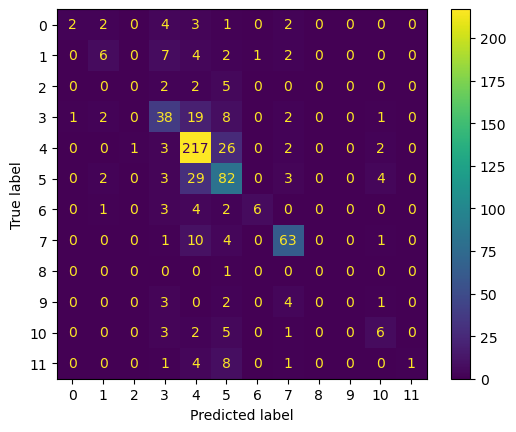

In [58]:
# Fit model on training set - same algorithm as before
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluate model
print(round(accuracy_score(y_test, y_pred), 4))
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = ConfusionMatrixDisplay(conf_mat)

conf_mat.plot()

### 5. Word2Vec embeddings and Logistic Regression
We can also represent the texts using the average of the word2vec vectors for the words comprising it, using pretrained word2vec embeddings.

Note: Downloading the pretrained vectors takes a while.

In [59]:
# Use an average of the word vectors in the text to represent the text
# download pretrained word2vec embeddings
import gensim.downloader
w2v_pretrained = gensim.downloader.load('word2vec-google-news-300')


def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in words if word in word2vec_model.key_to_index.keys()]
    if len(words) >= 1:
        return np.mean(word2vec_model[words], axis=0)
    else:
        # if a text has only OOV words it gets a vector of zeros
        return np.zeros(300, dtype=float) 
    
    
# Create the X and y for learning
def vec_for_learning(word2vec_model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], get_mean_vector(word2vec_model, doc.words)) for doc in sents])
    return targets, regressors

y_train, X_train = vec_for_learning(w2v_pretrained, train_tagged)
y_test, X_test = vec_for_learning(w2v_pretrained, test_tagged)

Train a logistic regression model using the averaged pretrained Word2Vec embeddings and check out the results.

0.672


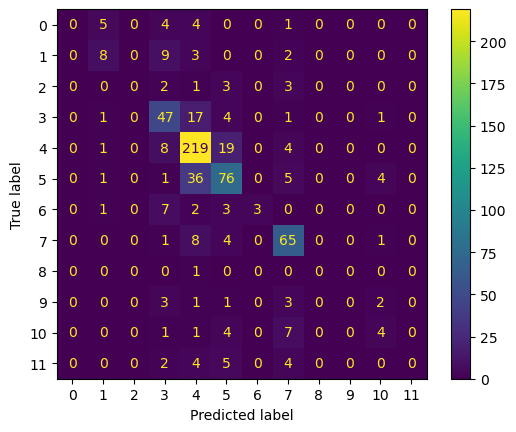

In [60]:
# Fit model on training set - same algorithm as before
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluate model
print(round(accuracy_score(y_test, y_pred), 4))
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat = ConfusionMatrixDisplay(conf_mat)

conf_mat.plot()


### Optional

As an exercise, you can try what we showed in this notebook on another text dataset. You could for example use the IMDB dataset available here: https://www.kaggle.com/code/avnika22/imdb-perform-sentiment-analysis-with-scikit-learn/data
where the goal is sentiment classification of movie reviews: classify the movie reviews into positive (denoted 1) or negative (denoted 0).   

## References
* https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4
* https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f